In [1]:
from bs4 import BeautifulSoup
import urllib.request as urllib

In [2]:
late_busses = 'https://www.seattleschools.org/departments/transportation/latebus'
page = urllib.urlopen(late_busses)
soup = BeautifulSoup(page, "html.parser")

<!DOCTYPE html>
<html id="ctl00_html" lang="en-US" xml:lang="en-US" xmlns="http://www.w3.org/1999/xhtml">
<head id="ctl00_Head1"><title>
	Delayed Bus Information - Seattle Public Schools
</title><base href="https://www.seattleschools.org/cms/One.aspx?portalId=627&amp;pageId=18397"/><script id="ctl00_00f77616769f0d4f891b41dfda94e8b04f53f1c11d0172b581e651aeac6863a9" src="https://p8dyncdn1.sharpschool.com/bundle/js/vendor.cfcd208495d565ef66e7dff9f98764da.js" type="text/javascript"></script><link href="https://p8dyncdn1.sharpschool.com/bundle/css/vendor.cfcd208495d565ef66e7dff9f98764da.css" id="ctl00_c8f4c6c953812b601a957ffb85881e061f80eb01e5e8c670167b133b4d5e4bbf" media="all" rel="stylesheet" type="text/css"/><script type="text/javascript">
            function Message_Recieved(event) {
                $("#MeetingsFrame").height(event.data + "px");
            }
            if (window.addEventListener) {
                addEventListener("message", Message_Recieved, false);
            }
 
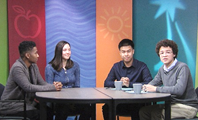
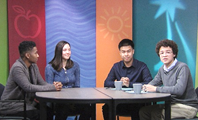
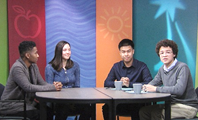

In [3]:
soup

In [3]:
[a, bus_list, b] = soup.find_all('p')
[a,date] = soup.find_all('h3')

In [4]:
date = str(date)
print(date)

date = date.strip('</h3>')
date = date.strip(',')
date = date.split(" ")
print(date)
months = ['January','February','March','April','May','June',
          'July','August','September','October','November','December']

i = 0
while date[i] not in months:
    i = i+1

the_month = date[i]
the_day = date[i+1]
the_year = date[i+2]

print(the_day[0:2])

if the_day[0:2].isdigit() == True:
    the_day = the_day[0:2]
else:
    the_day = the_day[0]

<h3>Today's Late Bus Alert for December 21st, 2018</h3>
["Today's", 'Late', 'Bus', 'Alert', 'for', 'December', '21st,', '2018']
21


In [5]:
bus_list = str(bus_list)
bus_list = bus_list.strip('<p>')
bus_list = bus_list.strip('</p>')
bus_list = bus_list.strip('is running')
bus_list

'Route 3 from Adams is running 20 minutes late<br/>\nRoute 120 from Loyal Heights is running 20 minutes late<br/>\nRoute 630 from Queen Anne is running 20 minutes late<br/>\nRoute 148 from Northgate is running 10 minutes late<br/>\nRoute 799 from Gatzert is running 2 hours late<br/>\nRoute 462 from Washington is running 1 hour late<br/>\nRoute 792 from Kimball is running 2 hours late<br/>\nRoute 402 from Cleveland is running 1 hour late<br/>\nRoute 624 from Fairmount Park is running 2 hours late<br/>\nRoute 464 from Washington is running 1 hour late<br/>\nRoute 795 from Leschi is running 2 hours late<br/>\nRoute 456 from Meany is running 1 hour late<br/>\nRoute 327 from Washington is running 1 hour late<br/>\nRoute 130 from Maple is running 2 hours late<br/>\nRoute 36 from Dearborn Park is running 2 hours late<br/>\nRoute 213 from Viewlands is running 2 hours late<br/>\nRoute 79 from John Hay is running 1 hour late<br/>\nRoute 317 from Meany is running 1 hour late<br/>\nRoute 576 from 

In [6]:
import numpy as np
bus_list_array = bus_list.split("<br/>")
print(bus_list_array)

['Route 3 from Adams is running 20 minutes late', '\nRoute 120 from Loyal Heights is running 20 minutes late', '\nRoute 630 from Queen Anne is running 20 minutes late', '\nRoute 148 from Northgate is running 10 minutes late', '\nRoute 799 from Gatzert is running 2 hours late', '\nRoute 462 from Washington is running 1 hour late', '\nRoute 792 from Kimball is running 2 hours late', '\nRoute 402 from Cleveland is running 1 hour late', '\nRoute 624 from Fairmount Park is running 2 hours late', '\nRoute 464 from Washington is running 1 hour late', '\nRoute 795 from Leschi is running 2 hours late', '\nRoute 456 from Meany is running 1 hour late', '\nRoute 327 from Washington is running 1 hour late', '\nRoute 130 from Maple is running 2 hours late', '\nRoute 36 from Dearborn Park is running 2 hours late', '\nRoute 213 from Viewlands is running 2 hours late', '\nRoute 79 from John Hay is running 1 hour late', '\nRoute 317 from Meany is running 1 hour late', '\nRoute 576 from TOPS is running 2

In [7]:
new_bus_array = []

for string in bus_list_array:
    string = string.split(' ')
    new_bus_array.append(string)

In [20]:
import pandas as pd
from datascience import *

bus_number_list = []
school_list = []
to_from_list = []
time_list = []
unit_list = []
month_list = []
day_list = []
year_list = []


for list_item in new_bus_array:
    bus_number_list.append(int(list_item[1]))
    to_from_list.append(list_item[2])
    
    #schools
    if list_item[4] == "is":
        is_index = 4
        school_list.append(list_item[3])
    elif list_item[5] == "is":
        is_index = 5
        school_list.append(list_item[3]+" "+list_item[4])
    elif list_item[6] == "is":
        is_index = 6
        school_list.append(list_item[3]+" "+list_item[4]+" "+list_item[5])
        
    #time
    if list_item[is_index+3] == 'minutes':
        time_list.append(int(list_item[is_index+2]))
    elif list_item[is_index+3] == 'hours' or list_item[is_index+3] == 'hour' :
        time_list.append(60*int(list_item[is_index+2]))
        
    unit_list.append("minutes")
    month_list.append(the_month)
    day_list.append(the_day)
    year_list.append(the_year)

In [23]:
BusDataSet = list(zip(month_list,day_list,year_list,bus_number_list,school_list, to_from_list, time_list, unit_list))

df = pd.read_pickle('bus_data.pk1')

df2 = pd.DataFrame(data = BusDataSet, columns=['Month', 'Day','Year',
                                              'Bus Number','School',
                                              'To/From','Time','Unit'])

df3 = df.append(df2,ignore_index=True)

#df3.to_pickle('bus_data.pk1')

print(df3[0:19])

       Month Day  Year  Bus Number          School To/From   Time     Unit
0   December  21  2018         3.0           Adams    from   20.0  minutes
1   December  21  2018       120.0   Loyal Heights    from   20.0  minutes
2   December  21  2018       630.0      Queen Anne    from   20.0  minutes
3   December  21  2018       148.0       Northgate    from   10.0  minutes
4   December  21  2018       799.0         Gatzert    from  120.0  minutes
5   December  21  2018       462.0      Washington    from   60.0  minutes
6   December  21  2018       792.0         Kimball    from  120.0  minutes
7   December  21  2018       402.0       Cleveland    from   60.0  minutes
8   December  21  2018       624.0  Fairmount Park    from  120.0  minutes
9   December  21  2018       464.0      Washington    from   60.0  minutes
10  December  21  2018       795.0          Leschi    from  120.0  minutes
11  December  21  2018       456.0           Meany    from   60.0  minutes
12  December  21  2018   

In [20]:
!conda install basemap

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.5.12

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

KeyError: 'PROJ_LIB'

In [25]:
!echo $PROJ_LIB

In [22]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

NameError: name 'plt' is not defined